# 1---ไฟล์ Model_Create เป็นไฟล์ที่ใช้สร้าง Model เพื่อนำไป Train

In [1]:
import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
from td_utils import *
%matplotlib inline

c:\users\mouy\python\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
activates, negatives, backgrounds = load_raw_audio()

In [3]:
Tx = 5511
Ty = 1375
n_freq= 101

## Check ขนาด Spectrogram ของ backgrounds

##### Spectrogram = 5511

In [4]:
IPython.display.Audio("D:/Babie/DetectHelp/Data/BG/13.wav")

In [ ]:
count = 19
Num_BG = 1

for i in range (count):
    x = graph_spectrogram("D:/Babie/DetectHelp/Data/BG/"+str(Num_BG)+".wav")
    print("BG"+str(i+1)+" : spectrogram : ", x.shape)
    count+=1   

## ----------------------------------------------------------------------------

## Functions ที่ใช้

In [5]:
def get_random_time_segment(segment_ms):

    segment_start = np.random.randint(low=0, high=10000-segment_ms) 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)

In [6]:
def is_overlapping(segment_time, previous_segments):
    
    segment_start, segment_end = segment_time
    overlap = False 
    
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True

    return overlap

In [7]:
def insert_audio_clip(background, audio_clip, previous_segments):

    segment_ms = len(audio_clip)
    segment_time = get_random_time_segment(segment_ms)
    
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)

    previous_segments.append(segment_time)
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

In [8]:
def insert_ones(y, segment_end_ms):

    segment_end_y = int(segment_end_ms * Ty / 10000.0)

    for i in range(segment_end_y + 1, segment_end_y + 51):
        if i < Ty:
            y[0, i] = 1
    
    return y

## ไม่ต้องการ Random Help

In [9]:
# def create_training_example(background, activates, negatives, num_file):
   
#     background = background - 20 
#     y = np.zeros((1, Ty))
#     previous_segments = []
    
#     background, segment_time = insert_audio_clip(background, activates, previous_segments)
#     segment_start, segment_end = segment_time
#     y = insert_ones(y, segment_end_ms=segment_end)
    
#     number_of_negatives = np.random.randint(0, 2)
#     random_indices = np.random.randint(len(negatives), size=number_of_negatives)
#     random_negatives = [negatives[i] for i in random_indices]

#     for random_negative in random_negatives:
#         background, _ = insert_audio_clip(background, random_negative, previous_segments)

#     background = match_target_amplitude(background, -20.0)
#     filename = "D:/Babie/DetectHelp/train_wave/train" + str(num_file) + ".wav"
#     file_handle = background.export(filename, format="wav")
#     x = graph_spectrogram(filename)
    
#     return x, y

In [11]:
# count = 0
# X = []
# Y = []

# for i in range(19):
#     for j in range(243):
#         count+=1
#         print("train",count)        
#         x, y = create_training_example(backgrounds[i], activates[j], negatives, count)
        
#         print(x.shape)
#         if x.shape == (101,5511) and y.shape == (1,1375):
#             x = x.swapaxes(0,1)
#             y = y.swapaxes(0,1)
#             X.append(x)
#             Y.append(y)

#             sep_point=(len(X)*4)//5

# X_train = X[:sep_point]
# X_train = np.array(X_train)

# Y_train = Y[:sep_point]
# Y_train = np.array(Y_train)

# X_test = X[sep_point:]
# X_test = np.array(X_test)

# Y_test = Y[sep_point:]
# Y_test = np.array(Y_test)

## ต้องการ Random Help

In [12]:
def create_training_example(background, activates, negatives, num_file):

    np.random.seed(num_file)
    background = background - 20
    y = np.zeros((1, Ty))
    previous_segments = []

    number_of_activates = np.random.randint(1, 3)
    random_indices = np.random.randint(len(activates), size=number_of_activates)
    random_activates = [activates[i] for i in random_indices]

    for random_activate in random_activates:
        background, segment_time = insert_audio_clip(background, random_activate, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_ones(y, segment_end_ms=segment_end)

    number_of_negatives = np.random.randint(1, 4)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]

    for random_negative in random_negatives:
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
 
    background = match_target_amplitude(background, -20.0)
    filename = "D:/Babie/DetectHelp/Code_Help/train_wave/train" + str(num_file) + ".wav"
    file_handle = background.export(filename, format="wav")
    x = graph_spectrogram(filename)
    
    return x, y

train 10001
(101, 5511)
train 10002
(101, 5511)
train 10003
(101, 5511)
train 10004
(101, 5511)
train 10005
(101, 5511)
train 10006
(101, 5511)
train 10007
(101, 5511)
train 10008
(101, 5511)
train 10009
(101, 5511)
train 10010
(101, 5511)
train 10011
(101, 5511)
train 10012
(101, 5511)
train 10013
(101, 5511)
train 10014
(101, 5511)
train 10015
(101, 5511)
train 10016
(101, 5511)
train 10017
(101, 5511)
train 10018
(101, 5511)
train 10019
(101, 5511)
train 10020
(101, 5511)
train 10021
(101, 5511)
train 10022
(101, 5511)
train 10023
(101, 5511)
train 10024
(101, 5511)
train 10025
(101, 5511)
train 10026
(101, 5511)
train 10027
(101, 5511)
train 10028
(101, 5511)
train 10029
(101, 5511)
train 10030
(101, 5511)
train 10031
(101, 5511)
train 10032
(101, 5511)
train 10033
(101, 5511)
train 10034
(101, 5511)
train 10035
(101, 5511)
train 10036
(101, 5511)
train 10037
(101, 5511)
train 10038
(101, 5511)
train 10039
(101, 5511)
train 10040
(101, 5511)
train 10041
(101, 5511)
train 10042
(101

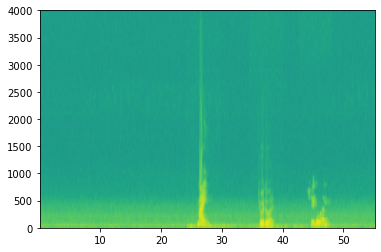

In [13]:
count = 10000
X = []
Y = []
for i in range(3000):
    count+=1
    print("train",count) 
    if count%2 == 0:
        x, y = create_training_example(backgrounds[1], activates, negatives, count)
    else:
        x, y = create_training_example(backgrounds[2], activates, negatives, count)
    print(x.shape)
    if x.shape == (101,5511) and y.shape == (1,1375):
        x = x.swapaxes(0,1)
        y = y.swapaxes(0,1)
        X.append(x)
        Y.append(y)

        sep_point = (len(X)*4)//5

X_train = X[:sep_point]
X_train = np.array(X_train)

Y_train = Y[:sep_point]
Y_train = np.array(Y_train)

X_test = X[sep_point:]
X_test = np.array(X_test)

Y_test = Y[sep_point:]
Y_test = np.array(Y_test)

## ----------------------------------------------------------------------------

## ฟังเสียง

In [14]:
IPython.display.Audio('D:/Babie/DetectHelp/Code_Help/train_wave/train13000.wav')

## Save ข้อมูล

In [15]:
np.save('D:/Babie/DetectHelp/Code_Help/Train/XY_train/X_model3.npy', X_train)
np.save('D:/Babie/DetectHelp/Code_Help/Train/XY_train/Y_model3.npy', Y_train)

In [16]:
np.save('D:/Babie/DetectHelp/Code_Help/Train/XY_dev/X_model_dev3.npy', X_test)
np.save('D:/Babie/DetectHelp/Code_Help/Train/XY_dev/Y_model_dev3.npy', Y_test)